In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Vamos a poner en práctica lo aprendido. Puedes utilizar el código de la ayudantía para guiarte.

Normalmente, la propagación de una enfermedad epidémica suele seguir un comportamiento singular:

Al inicio suele tener un crecimiento exponencial pero llega un momento en que tiende a estabilizarse y la expansión de la enfermedad suele ser muy lenta, al punto en que tiende a detenerse (Porque ya toda la población se contagió o alcanzó a generar anticuerpos para defenderse de esta).

### La función lógistica 

Dicho comportamiento lo podemos modelar matemáticamente con una distribución llamada [distribución logística](https://en.wikipedia.org/wiki/Logistic_distribution) (Distribución que usaremos más adelante cuando empecemos a ver modelos de machine learning)



$$f(x) = \frac{1}{1+e^{-x}}$$


Algunas observaciones interesantes (Datos freak para toda la carrera):

- Su dominio son los reales
- su recorrido es (0,1)
- $\lim_{{x \to \infty}} \frac{1}{1 + e^{-x}} = 1$
- $\lim_{{x \to -\infty}} \frac{1}{1 + e^{-x}} = 0$


Esta función es muy útil porque nos permite mapear todos los números reales al valores en el intervalo (0,1)


### Ahora veamos los datos:



In [4]:
covid = pd.read_csv('covid.csv')
covid 

,day,infected_population,health_rate,cured,mortality_rate,death,containment measures,hospital_capacity,vulnerable_population,infection_rate
0,0,0.000045,0.128903,0.000006,0.025198,0.000001,0.400013,0.605186,0.293235,0.047167
1,1,0.000056,0.274309,0.000015,0.039182,0.000002,0.725656,0.646105,0.132006,0.056185
2,2,0.000068,0.397319,0.000027,0.059187,0.000004,0.094069,0.692797,0.187133,0.045204
3,3,0.000083,0.495051,0.000041,0.077409,0.000006,0.525884,0.649058,0.262797,0.056456
4,4,0.000102,0.580371,0.000059,0.098656,0.000010,0.944633,0.844166,0.290620,0.044665
...,...,...,...,...,...,...,...,...,...,...
95,95,0.999898,1.000000,0.999898,0.100000,0.099990,0.336750,0.638893,0.249647,0.048408
96,96,0.999917,1.000000,0.999917,0.100000,0.099992,0.425017,0.803175,0.122158,0.055790
97,97,0.999932,1.000000,0.999932,0.100000,0.099993,0.654735,0.722148,0.177293,0.046123
98,98,0.999944,1.000000,0.999944,0.100000,0.099994,0.997512,0.650430,0.100035,0.044490


## Primero veamos un resumen de los datos.

In [11]:
covid.describe()

,day,infected_population,health_rate,cured,mortality_rate,death,containment measures,hospital_capacity,vulnerable_population,infection_rate
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.500000,0.963107,0.499997,0.097996,0.050000,0.483720,0.745054,0.211225,0.051466
std,29.011492,0.450033,0.145041,0.450036,0.010575,0.045003,0.288667,0.088749,0.060615,0.008540
min,0.000000,0.000045,0.128903,0.000006,0.025198,0.000001,0.006780,0.604992,0.100035,0.025577
25%,24.750000,0.006717,1.000000,0.006717,0.100000,0.000672,0.217662,0.663260,0.156566,0.045976
50%,49.500000,0.500000,1.000000,0.500000,0.100000,0.050000,0.474874,0.748446,0.205627,0.051223
75%,74.250000,0.993283,1.000000,0.993283,0.100000,0.099328,0.735720,0.809624,0.269934,0.056410
max,99.000000,0.999955,1.000000,0.999955,0.100000,0.099995,0.997512,0.899482,0.299872,0.075142


,day,infected_population,health_rate,cured,mortality_rate,death,containment measures,hospital_capacity,vulnerable_population,infection_rate
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.500000,0.963107,0.499997,0.097996,0.050000,0.483720,0.745054,0.211225,0.051466
std,29.011492,0.450033,0.145041,0.450036,0.010575,0.045003,0.288667,0.088749,0.060615,0.008540
min,0.000000,0.000045,0.128903,0.000006,0.025198,0.000001,0.006780,0.604992,0.100035,0.025577
25%,24.750000,0.006717,1.000000,0.006717,0.100000,0.000672,0.217662,0.663260,0.156566,0.045976
50%,49.500000,0.500000,1.000000,0.500000,0.100000,0.050000,0.474874,0.748446,0.205627,0.051223
75%,74.250000,0.993283,1.000000,0.993283,0.100000,0.099328,0.735720,0.809624,0.269934,0.056410
max,99.000000,0.999955,1.000000,0.999955,0.100000,0.099995,0.997512,0.899482,0.299872,0.075142


In [15]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    100 non-null    int64  
 1   infected_population    100 non-null    float64
 2   health_rate            100 non-null    float64
 3   cured                  100 non-null    float64
 4   mortality_rate         100 non-null    float64
 5   death                  100 non-null    float64
 6   containment measures   100 non-null    float64
 7   hospital_capacity      100 non-null    float64
 8   vulnerable_population  100 non-null    float64
 9   infection_rate         100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    100 non-null    int64  
 1   infected_population    100 non-null    float64
 2   health_rate            100 non-null    float64
 3   cured                  100 non-null    float64
 4   mortality_rate         100 non-null    float64
 5   death                  100 non-null    float64
 6   containment measures   100 non-null    float64
 7   hospital_capacity      100 non-null    float64
 8   vulnerable_population  100 non-null    float64
 9   infection_rate         100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


## Encuentre la matriz de correlación

In [19]:
correlacion = covid[covid.columns].corr()
correlacion

,day,infected_population,health_rate,cured,mortality_rate,death,containment measures,hospital_capacity,vulnerable_population,infection_rate
day,1.000000,0.935879,0.418555,0.935883,0.319461,0.935881,0.117635,0.091051,-0.113101,-0.117166
infected_population,0.935879,1.000000,0.285417,1.000000,0.212620,1.000000,0.091249,0.102758,-0.097553,-0.101690
health_rate,0.418555,0.285417,1.000000,0.285436,0.911940,0.285428,-0.012863,0.215970,-0.055298,0.003655
cured,0.935883,1.000000,0.285436,1.000000,0.212634,1.000000,0.091247,0.102762,-0.097554,-0.101690
mortality_rate,0.319461,0.212620,0.911940,0.212634,1.000000,0.212632,0.019450,0.222239,-0.025295,0.020858
death,0.935881,1.000000,0.285428,1.000000,0.212632,1.000000,0.091249,0.102761,-0.097553,-0.101689
containment measures,0.117635,0.091249,-0.012863,0.091247,0.019450,0.091249,1.000000,-0.050398,0.042921,-0.227972
hospital_capacity,0.091051,0.102758,0.215970,0.102762,0.222239,0.102761,-0.050398,1.000000,0.038958,0.184785
vulnerable_population,-0.113101,-0.097553,-0.055298,-0.097554,-0.025295,-0.097553,0.042921,0.038958,1.000000,-0.110208
infection_rate,-0.117166,-0.101690,0.003655,-0.101690,0.020858,-0.101689,-0.227972,0.184785,-0.110208,1.000000


,day,infected_population,health_rate,cured,mortality_rate,death,containment measures,hospital_capacity,vulnerable_population,infection_rate
day,1.000000,0.935879,0.418555,0.935883,0.319461,0.935881,0.117635,0.091051,-0.113101,-0.117166
infected_population,0.935879,1.000000,0.285417,1.000000,0.212620,1.000000,0.091249,0.102758,-0.097553,-0.101690
health_rate,0.418555,0.285417,1.000000,0.285436,0.911940,0.285428,-0.012863,0.215970,-0.055298,0.003655
cured,0.935883,1.000000,0.285436,1.000000,0.212634,1.000000,0.091247,0.102762,-0.097554,-0.101690
mortality_rate,0.319461,0.212620,0.911940,0.212634,1.000000,0.212632,0.019450,0.222239,-0.025295,0.020858
death,0.935881,1.000000,0.285428,1.000000,0.212632,1.000000,0.091249,0.102761,-0.097553,-0.101689
containment measures,0.117635,0.091249,-0.012863,0.091247,0.019450,0.091249,1.000000,-0.050398,0.042921,-0.227972
hospital_capacity,0.091051,0.102758,0.215970,0.102762,0.222239,0.102761,-0.050398,1.000000,0.038958,0.184785
vulnerable_population,-0.113101,-0.097553,-0.055298,-0.097554,-0.025295,-0.097553,0.042921,0.038958,1.000000,-0.110208
infection_rate,-0.117166,-0.101690,0.003655,-0.101690,0.020858,-0.101689,-0.227972,0.184785,-0.110208,1.000000


## Una buena forma de obtener un resultado más visual es utilizar un heatmap. Grafique el heatmap de este dataset.

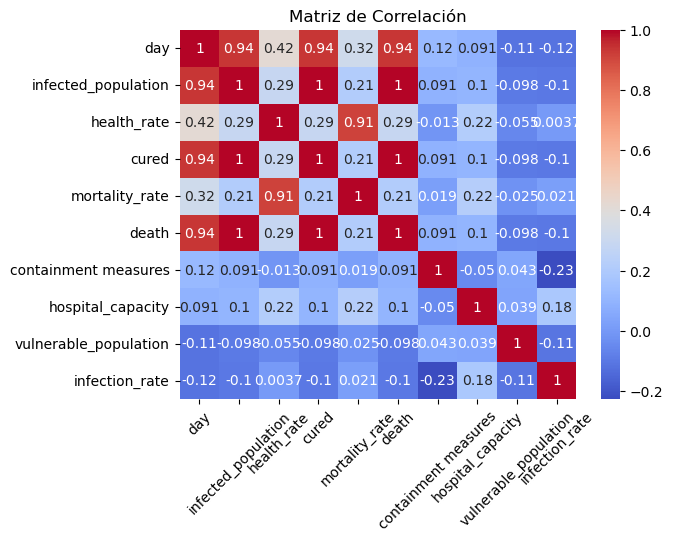

In [21]:
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.xticks(rotation=45)
plt.show()

<Axes: >

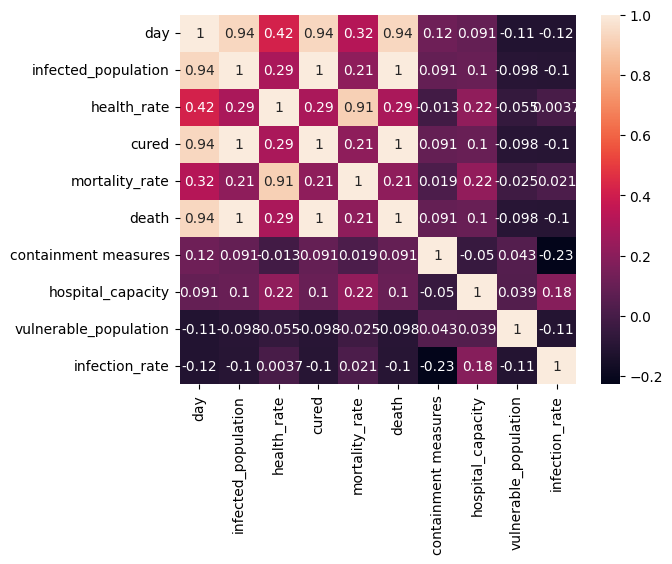

## Otro comando interesante de Seaborn es el método [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Utilícelo para obtener todas las combinaciones posibles de gráficos.

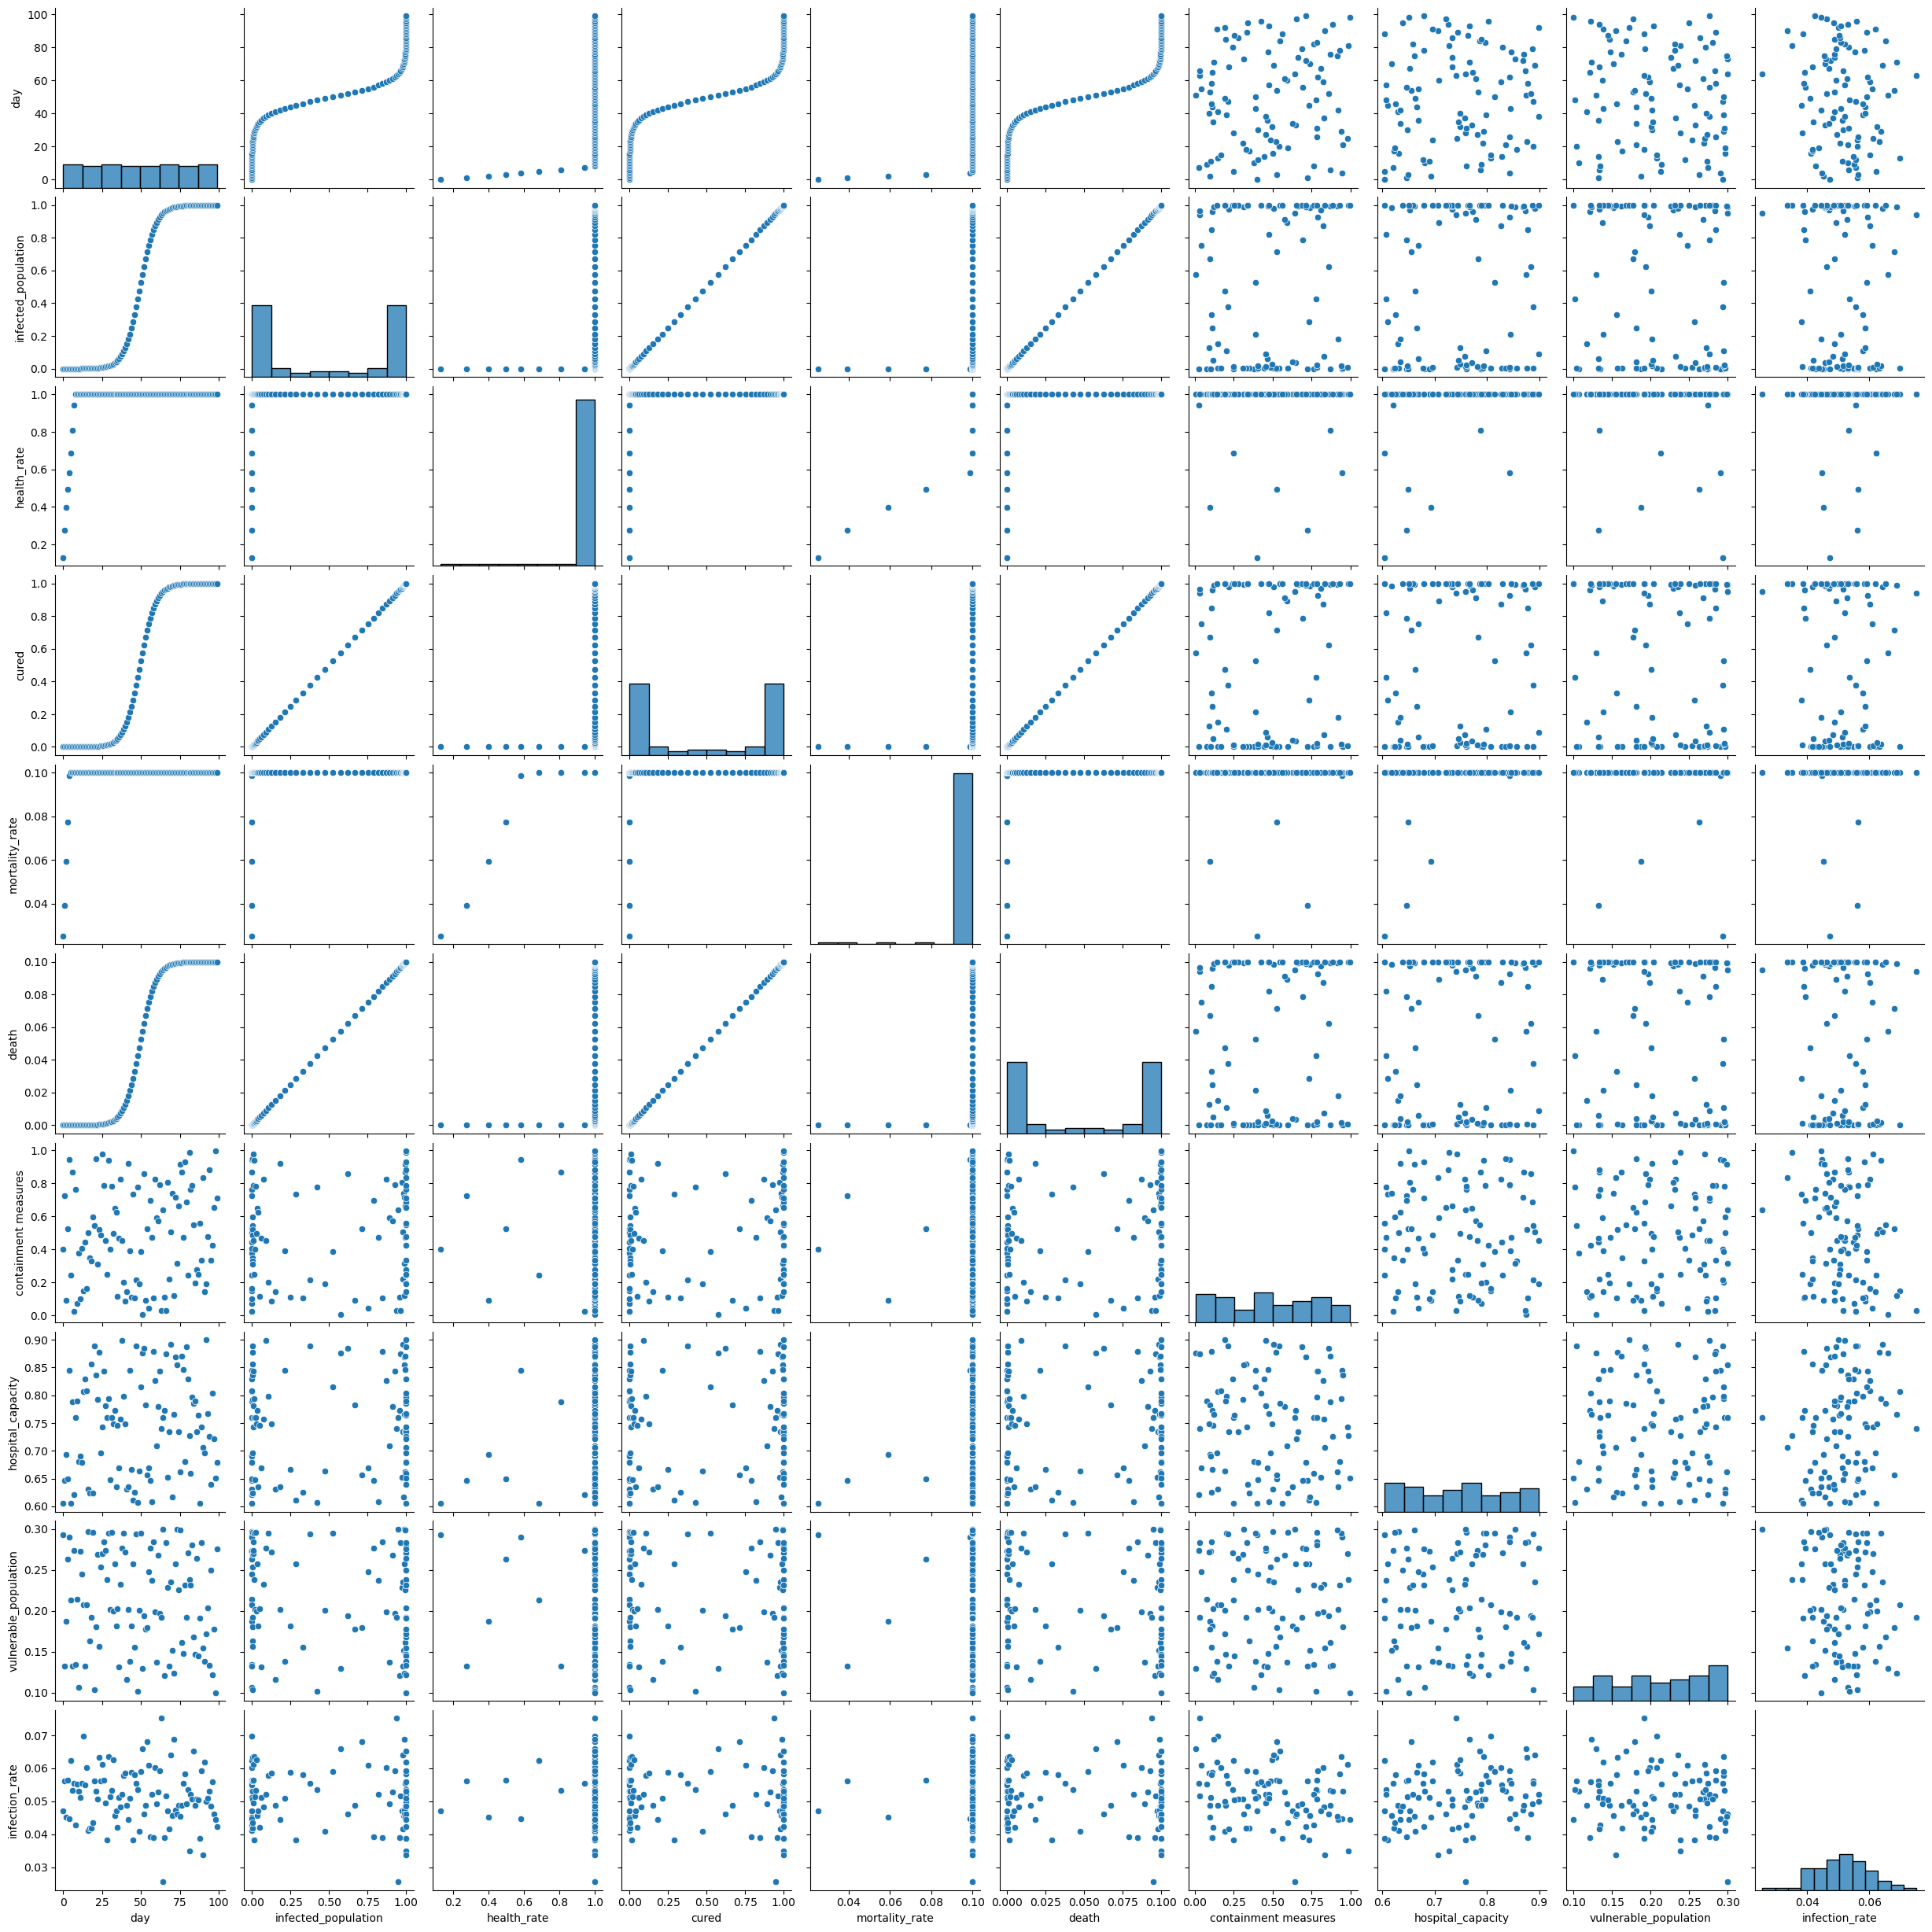

In [25]:
sns.pairplot(covid)

## De la experiencia anterior con pairplot pudimos notar algunas propiedades interesantes que se cumplen en el dataset

En primer lugar, pudimos observar que la población infectada a lo largo del tiempo efectivamente sigue la gráfica de una curva logística. 
Grafíquela usando el gráfico más básico de matplotlib (plt.plot)

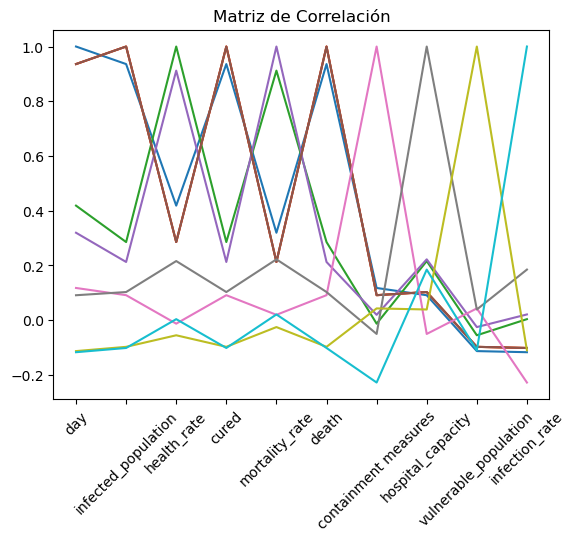

In [31]:
plt.plot(correlacion)
plt.title("Matriz de Correlación")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'infected_population')

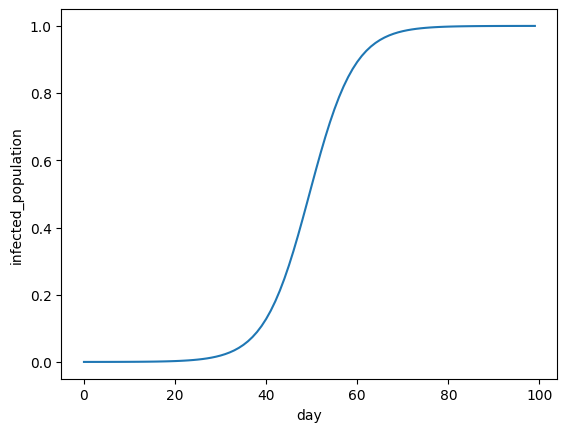

## El siguiente histograma modela la frecuencia de la tasa de infectados en intervalos equidistantes. 

Text(0, 0.5, 'Frequency')

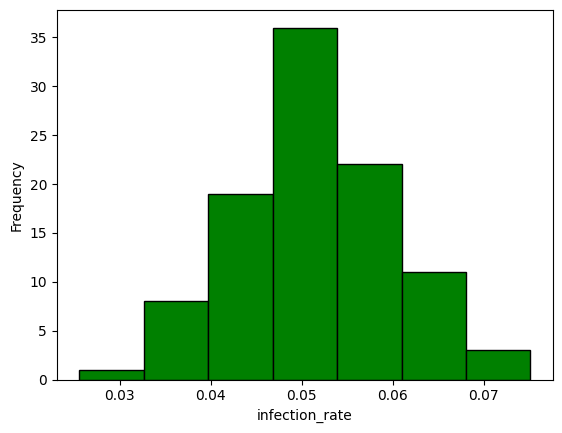

## ¿Podemos concluir que la tasa de tasa de infección es decreciente en el tiempo?

Puede usar lo obtenido en en la parte del pairplot para poder responder esta pregunta. 

## En último lugar consideremos lo siguiente

El ministerio de salud, nos informa que los científicos de datos UC que contrataron encontraron el siguiente patrón 
en la columna 'vulnerable_population'. Para ello te piden que crees una columna adicional llamada 'status'.

Sea:
a = min(vulnerable_population)
b = max(vulnerable population)

- Si el valor de vulnerable population está en el intervalo $(a ; a+(b-a)*0.33)$ entonces la categoría a asignar es low.
- Si el valor de vulnerable population está en el intervalo $(a+(b-a)*0.33 ; a+(b-a)*0.66)$ entonces la categoría a asignar es medium.
- Si el valor de vulnerable population está en el intervalo $(a+(b-a)*0.66 ; b)$ entonces la categoría a asignar es high.



,vulnerable_population,status
0,0.293235,high
1,0.132006,low
2,0.187133,medium
3,0.262797,high
4,0.290620,high
...,...,...
95,0.249647,high
96,0.122158,low
97,0.177293,medium
98,0.100035,low


### Finalmente, lo obtenido gráfiquelo usando sns.displot.

Displot debe recibir al menos lo siguiente:

- hue = 'status'
- kde = True
- bins = 30

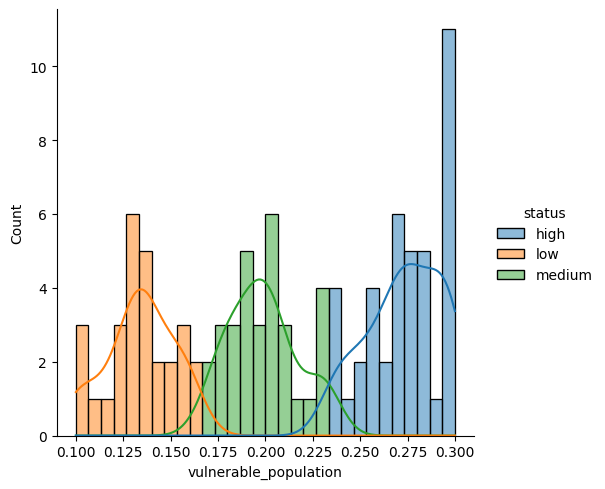